# US Accidents Exploratory Data Analysis

## Introduction:
  #### Source, what it contains, how it will be useful  

### Importing the necessary libraries 

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Putting the data in the pandas dataframe

In [2]:
df=pd.read_csv('US_Accidents_Dec21_updated.csv')

### Data preparation and cleaning

#### Steps: 
#### 1. Look at columns, understand it

In [11]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics).describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [16]:
len(df.select_dtypes(include=numerics).columns)

14

#### 2. Look for missing values if any

In [19]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [22]:
df.isna().sum().sort_values(ascending=False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Astronomical_Twilight       2867
Sunrise_Sunset              2867
Civil_Twilight              2867
Zipcode                     1319
City                         137
Street                         2
Distance(mi)                   0
Side                           0
Description                    0
Bump                           0
County                         0
End_Lat                        0
Start_Lng                      0
Start_Lat                      0
End_Time                       0
Start_Time                     0
Severity  

##### Percentage of missing values 

In [25]:
missing_percentages=(df.isna().sum().sort_values(ascending=False)/len(df))*100

In [33]:
missing_percentages[missing_percentages>2]

Number               61.290031
Precipitation(in)    19.310789
Wind_Chill(F)        16.505678
Wind_Speed(mph)       5.550967
Wind_Direction        2.592834
Humidity(%)           2.568830
Weather_Condition     2.482514
Visibility(mi)        2.479350
Temperature(F)        2.434646
Pressure(in)          2.080593
dtype: float64

<BarContainer object of 10 artists>

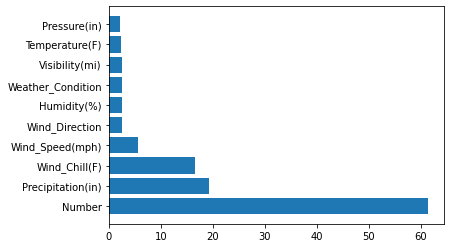

In [39]:
plt.barh(missing_percentages[missing_percentages>2].index,missing_percentages[missing_percentages>2])

#### Inferance :- Street number in most of the data is missing. better to skip the column.

In [5]:
#Exploratory analysis and visualization

In [40]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

####  City Column

In [3]:
df.City.unique()

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Clarksdale', 'Bridgeboro',
       'American Fork-Pleasant Grove'], dtype=object)

In [4]:
len(df.City.unique())

11682

In [28]:
cities_by_accident=df.City.value_counts()
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

In [24]:
'New York' in df['City']

False

In [26]:
'New York' in df['City'].unique()

True

In [13]:
df[df.City == 'New York'].count()

ID                       7068
Severity                 7068
Start_Time               7068
End_Time                 7068
Start_Lat                7068
Start_Lng                7068
End_Lat                  7068
End_Lng                  7068
Distance(mi)             7068
Description              7068
Number                    872
Street                   7068
Side                     7068
City                     7068
County                   7068
State                    7068
Zipcode                  7068
Country                  7068
Timezone                 7068
Airport_Code             7068
Weather_Timestamp        7019
Temperature(F)           6997
Wind_Chill(F)            5073
Humidity(%)              6997
Pressure(in)             6924
Visibility(mi)           6920
Wind_Direction           6509
Wind_Speed(mph)          5951
Precipitation(in)        5455
Weather_Condition        6971
Amenity                  7068
Bump                     7068
Crossing                 7068
Give_Way  

In [27]:
cities_by_accident[50:70]

New York            7068
Fort Worth          7029
Bradenton           7021
Fort Myers          6971
Grand Rapids        6951
San Francisco       6924
Sarasota            6908
Lancaster           6882
San Antonio         6862
Kissimmee           6858
Brooklyn            6421
Saint Petersburg    6199
Shreveport          6145
Pensacola           6098
Arlington           5930
Saint Louis         5733
Stockton            5579
Dayton              5542
Newark              5258
Norfolk             5115
Name: City, dtype: int64

<BarContainer object of 20 artists>

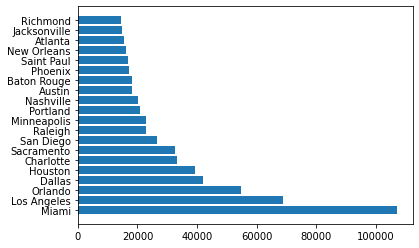

In [30]:
plt.barh(cities_by_accident[:20].index,cities_by_accident[:20])

C:\Users\Aakash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

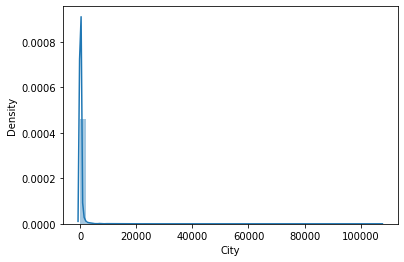

In [55]:
sns.distplot(cities_by_accident)

In [57]:
high_accident_cities=cities_by_accident[cities_by_accident>1000]
low_accident_cities=cities_by_accident[cities_by_accident<=1000]

In [63]:
len(high_accident_cities)/len(cities_by_accident)

0.042290899751733585

C:\Users\Aakash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

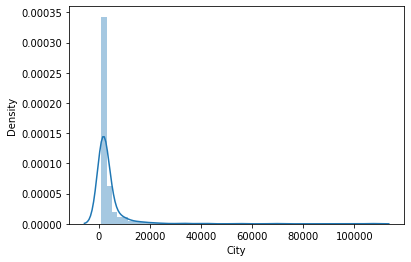

In [72]:
sns.distplot(high_accident_cities)

<AxesSubplot:xlabel='City', ylabel='Count'>

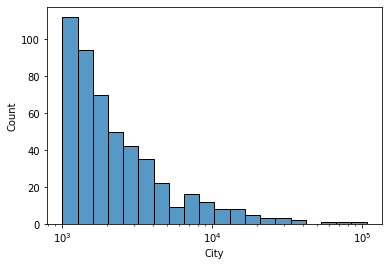

In [76]:
sns.histplot(high_accident_cities,log_scale=True)

C:\Users\Aakash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

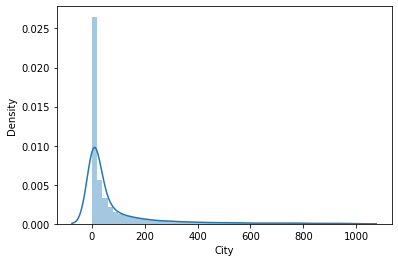

In [69]:
sns.distplot(low_accident_cities)

<AxesSubplot:xlabel='City', ylabel='Count'>

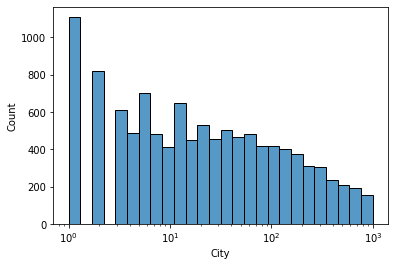

In [77]:
sns.histplot(low_accident_cities,log_scale=True)

In [80]:
cities_by_accident[cities_by_accident<10]

Tillatoba       9
Castlewood      9
Craigmont       9
Beavercreek     9
Castle Creek    9
               ..
Minonk          1
Sandoval        1
Labadie         1
District 7      1
Chokoloskee     1
Name: City, Length: 4428, dtype: int64

### Ask and Answer Questions

#### 1. Are there more accidents in warmer or colder areas ?
#### 2. Which states has the height number of accidents? per capita accidents ?
#### 3. Effect of rain on Accidents ?
#### 4. how many were point accidents ? how many were huge accidents ?
#### 5. what is rank of New York in terms of no of accidents ? why is it so low as compared to the population ?
#### 6 Among the top 100 cities which states do they belong to most frequently ?




In [81]:
#Summery and conclusion
#   Around 5% of the cities have high accidents.(ie. Above 1000 accidents)
#   Around 4500 cities have reported less than 10 accidents